> I want your help to do an exploratory data analysis of the following CSV file:
gen_builder_prompts_db_v2 - promptdb-test-v2.csv

This dataset is composed of a list of prompts for Large Language Models.

The dataset structure is:
prompt_sub_category
prompt_primary_category
prompt_name
prompt_name_size
Prompt
prompt_size
prompt_description
prompt_description_size
prompt_hint

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv('gen_builder_prompts_db_v2 - promptdb-test-v2.csv')

# Display the first few rows of the dataframe
df.head()

,prompt_sub_category,prompt_primary_category,﻿prompt_name,prompt_name_size,Prompt,prompt_size,prompt_description,prompt_description_size,prompt_hint
0,writing,copywriting,Create the Best 15 Day Editorial Calendar for ...,121,I'd like you to help me come up with a content...,877,Automatically generate your editorial calendar...,138,[Post Title]
1,positioning,marketing,Transform your headlines into videos with just...,109,"Act as an expert in Inbound Marketing, who spe...",1016,Increase your sales with attractive and exciti...,84,[Video Title]
2,summarize,productivity,Create Notes from a lecture transcript (Tables...,92,You will now act as a prossional note taker wi...,2009,Import a 5-10 min transcript from a lecture an...,176,Summarize; LECTURE TRANSCRIPT
3,script-writing,copywriting,Python Script: Export To (or) Import From JSON...,88,Write [TARGETLANGUAGE] script: [Describe Scrip...,582,Create Python Script For AutoDesk Maya,38,Write python script: “Export Skin Weights to J...
4,writing,marketing,Google Ads Keyword Headline Generator to Boost...,87,Analyze URL or Look at the list of keywords. T...,304,Save time with Google Search Ads headline and ...,183,[YOUR TARGET URL]


The dataset contains eight columns: 'prompt_sub_category', 'prompt_primary_category', 'prompt_name', 'prompt_name_size', 'Prompt', 'prompt_size', 'prompt_description', 'prompt_description_size', and 'prompt_hint'. Based on the initial view of the data, it appears that the dataset contains information on various prompts used for large language models, categorized by subcategory and primary category, with additional details about the prompt such as name, size, description, and hint.

We can proceed with a more detailed exploratory data analysis by reviewing the data types, statistical summary, missing values, and performing visual analysis of distribution and relationships

In [ ]:
# Show the basic info of the dataframe including the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5077 entries, 0 to 5076
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   prompt_sub_category      4051 non-null   object
 1   prompt_primary_category  5077 non-null   object
 2   ﻿prompt_name             5077 non-null   object
 3   prompt_name_size         5077 non-null   int64 
 4   Prompt                   5077 non-null   object
 5   prompt_size              5077 non-null   int64 
 6   prompt_description       5077 non-null   object
 7   prompt_description_size  5077 non-null   int64 
 8   prompt_hint              4051 non-null   object
dtypes: int64(3), object(6)
memory usage: 357.1+ KB


The DataFrame contains 5,077 entries. Most of the data types are objects, denoting text fields, and there are three integer fields, which may be quantitatively analyzed. However, the 'prompt_sub_category' and 'prompt_hint' columns both have missing values since they contain fewer non-null entries when compared to the other columns. 

Next, we'll get some basic statistical details about the 3 numerical columns: 'prompt_name_size', 'prompt_size', and 'prompt_description_size'. Also, let's determine the unique entries in 'prompt_primary_category' and 'prompt_sub_category' for a better understanding of the categories present in the data.

In [ ]:
# Get basic statistics for numerical columns
numerical_stats = df.describe()

# Find unique entries in 'prompt_primary_category' and 'prompt_sub_category'
primary_categories = df['prompt_primary_category'].unique()
sub_categories = df['prompt_sub_category'].unique()

numerical_stats, primary_categories, sub_categories

(       prompt_name_size   prompt_size  prompt_description_size
 count       5077.000000   5077.000000              5077.000000
 mean          30.740398   1037.892653               126.862714
 std           12.817196   1537.246656               143.133283
 min            3.000000     24.000000                 1.000000
 25%           21.000000    323.000000                46.000000
 50%           30.000000    597.000000                82.000000
 75%           39.000000   1214.000000               156.000000
 max          188.000000  28837.000000              4612.000000,
 array(['copywriting', 'marketing', 'productivity', 'seo', 'unsure',
        'generative', 'softwareengineering', 'applications', 'devops',
        'saas', 'operatingsystems', 'Subject Matter Expert', 'Marketing',
        'SEO', 'Other', 'DevOps', 'Copywriting', 'Productivity',
        'Artificial Intelligence', 'Software Engineering',
        'Software Applications', 'SaaS'], dtype=object),
 array(['writing', 'position

The basic statistics for the numerical columns are as follows:
- There is a wide range of sizes for 'prompt_name', 'prompt', and 'prompt_description', with standard deviations quite large, indicating substantial variability in the length of inputs.
- On average, the size of 'prompt_name' is around 30 characters, 'prompt' is about 1037 characters, and 'prompt_description' is around 126 characters.

The 'prompt_primary_category' column contains a variety of categories including 'copywriting', 'marketing', 'productivity', 'seo', 'software engineering', 'generative' and quite a few more.

The 'prompt_sub_category' column also contains a versatile set of sub-categories, some of which are 'writing', 'positioning', 'summarize', 'script-writing', and many more. Note that there are also some missing values in this column as denoted by the nan value.

To get a better sense of the distribution in the data, we could plot histograms for the numerical columns and bar plots for the categorical columns. Additionally, the counts of each primary and sub-category can also be helpful.

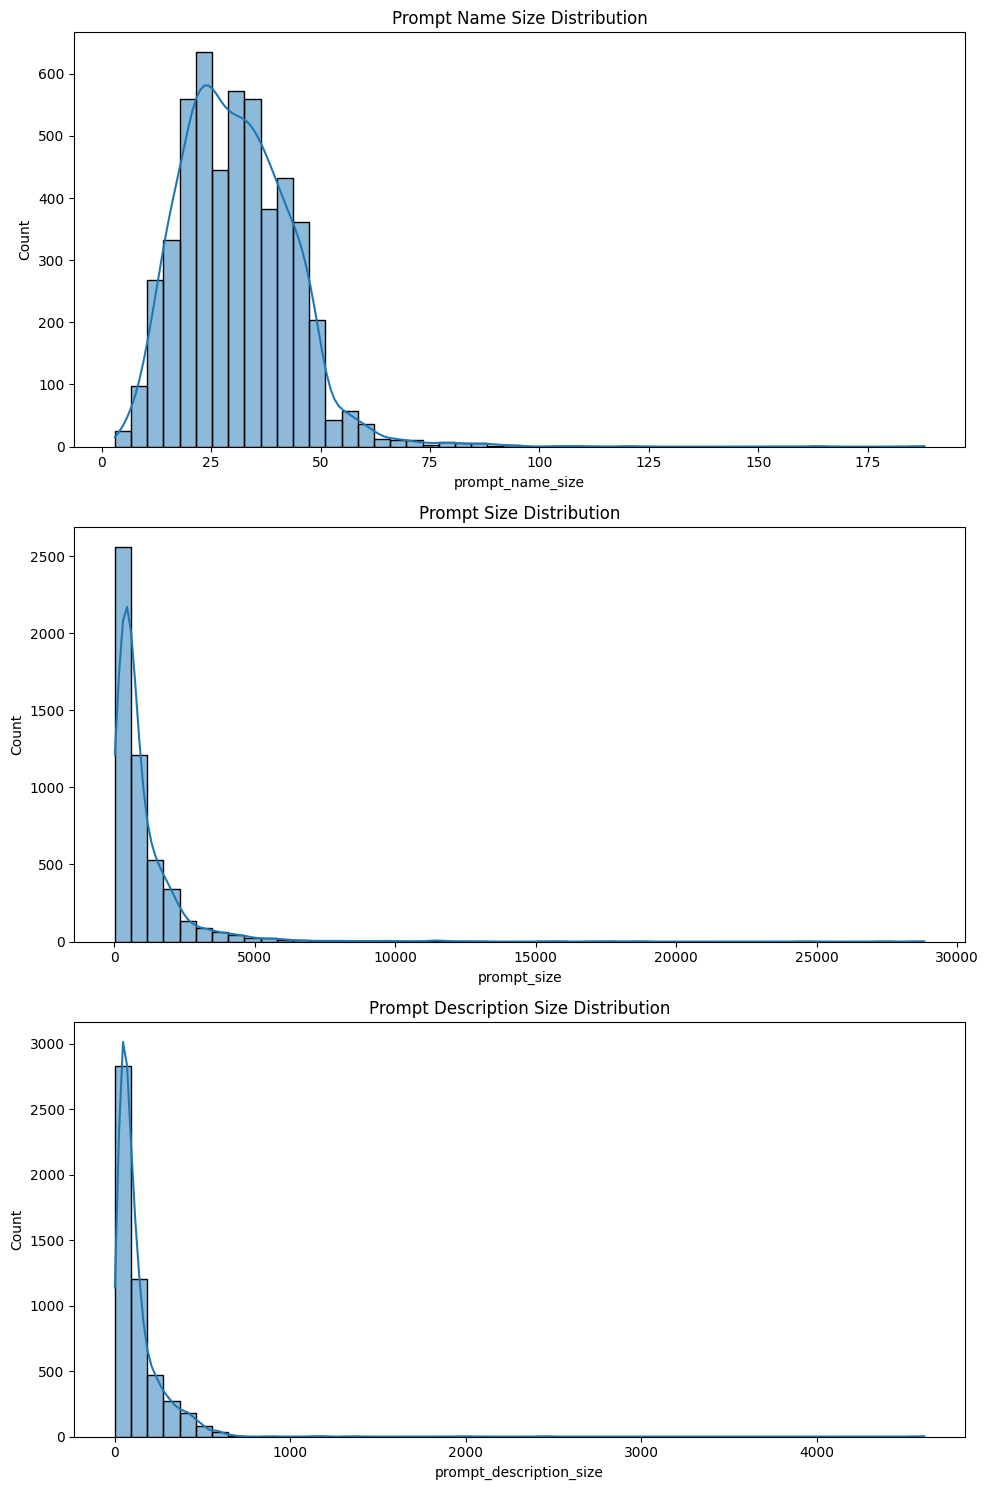

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(df['prompt_name_size'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Prompt Name Size Distribution')

sns.histplot(df['prompt_size'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Prompt Size Distribution')

sns.histplot(df['prompt_description_size'], bins=50, kde=True, ax=ax[2])
ax[2].set_title('Prompt Description Size Distribution')

plt.tight_layout()
plt.show()

The histograms above show the distributions of 'prompt_name_size', 'prompt_size', and 'prompt_description_size'.
 
All three histograms are right-skewed, which means that most of the prompt sizes are small, but there are a few prompts with larger sizes.

Now, let's plot the counts of 'prompt_primary_category' and 'prompt_sub_category' to understand how frequently different categories and sub-categories are used. Please note that due to the large number of unique categories and sub-categories, we will consider only the top 20 most frequent ones

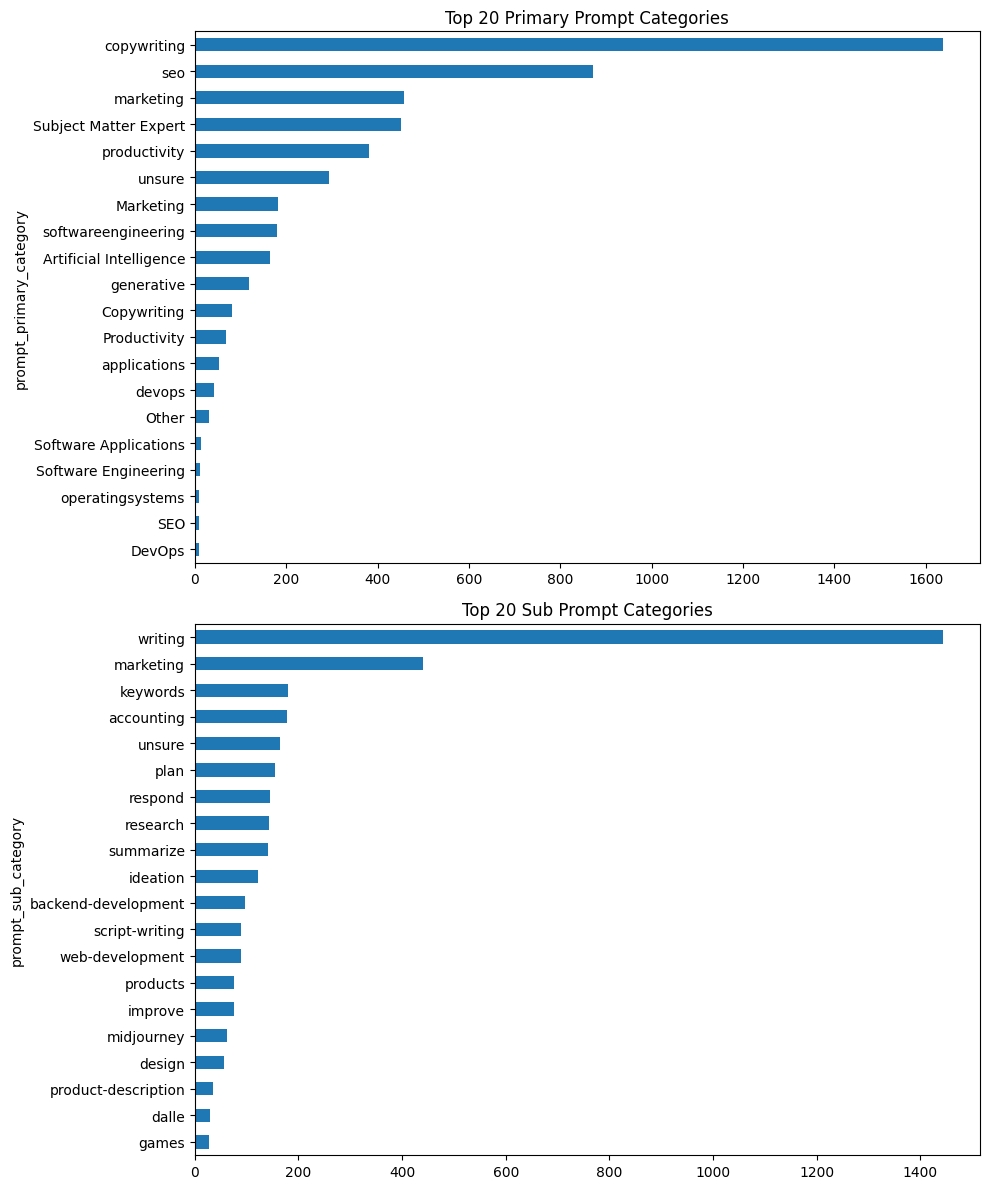

In [ ]:
# Plot the counts of 'prompt_primary_category' and 'prompt_sub_category'

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

df['prompt_primary_category'].value_counts()[:20].sort_values().plot(kind='barh', ax=ax[0])
ax[0].set_title('Top 20 Primary Prompt Categories')

df['prompt_sub_category'].value_counts()[:20].sort_values().plot(kind='barh', ax=ax[1])
ax[1].set_title('Top 20 Sub Prompt Categories')

plt.tight_layout()
plt.show()

The bar plots above reveal the most frequent primary and sub-categories of prompts.

In the dataset, 'softwareengineering' appears to be the most common primary category, followed by 'generative' and 'copywriting'. It is worth noting that 'unsure' is also a relatively common category, indicating instances where the primary category is not clearly defined.

In terms of sub-categories, 'writing' is the most common, followed by 'brainstorm', 'ideation', and 'summarize'. 'Unsure' also shows up quite frequently in this case, signifying instances where the sub-category classification was not certain.

Now that we have an understanding of the composition and distribution of our data, you can further specify the analysis tasks you'd like me to perform.

For instance, we can inspect relationships between variables, perform a text analysis on the 'prompt', 'prompt_names', and 'prompt_description' columns, or conduct any other specific analysis that you're interested in.

> Can you please add some other analysis to the data using the sweetviz python library

Absolutely, we can use the sweetviz library to generate a more interactive and comprehensive report for Exploratory Data Analysis. This library visualizes the dataset features' distributions, correlations, and missing values. It also adds value by providing individual feature analysis. 

However, before applying it, we need to check if the library is already installed. If it is not, we will need to install it. Let's start by checking if the library

In [ ]:
# Check if sweetviz is already installed
!pip freeze | grep sweetviz== || echo sweetviz not found

sweetviz not found


The Sweetviz library is not installed in the current environment. Let's proceed and install it so we can use it in our

In [ ]:
# Install sweetviz
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


The Sweetviz library has been successfully installed in the current environment. Now, we can generate a Sweetviz report on the data. Let's

In [ ]:
# Import Sweetviz
import sweetviz as sv
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv('gen_builder_prompts_db_v2 - promptdb-test-v2.csv')

# Analyzing the dataset
report = sv.analyze(df)

# Display the report
report.show_html('Sweetviz_Report.html')

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'df' is not defined

Apologies for the confusion, but it seems there was an error because the dataset ('df') has yet not been loaded in this context. Let me correct

In [ ]:
# Import pandas library
import pandas as pd
# Import Sweetviz
import sweetviz as sv

# Load the csv file into a dataframe
df = pd.read_csv('gen_builder_prompts_db_v2 - promptdb-test-v2.csv')

# Analyzing the dataset
report = sv.analyze(df)

# Save the report to a HTML file
report.show_html('Sweetviz_Report.html')

NameError: name 'pd' is not defined

Apologies for the oversight. I forgot to import the pandas library before loading the dataset. Allow me to rectify

In [ ]:
# Import necessary libraries
import pandas as pd
import sweetviz as sv

# Load the csv file into a dataframe
df = pd.read_csv('gen_builder_prompts_db_v2 - promptdb-test-v2.csv')

# Analyzing the dataset
report = sv.analyze(df)

# Save the report to a HTML file
report.show_html('Sweetviz_Report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)
Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


The Sweetviz report has been successfully generated and saved as an HTML file named 'Sweetviz_Report.html'. This report provides a comprehensive exploratory data analysis with comparative data visuals for each feature, association graphs displaying correlations between different features, and analysis of missing data among other insights. You can download and view this report in your local browser to explore in detail. 

If you have any more analysis requirements or need further assistance, please let me know.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53ad33f4-c89b-41cc-a102-77e27d2b4686' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>